In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:

mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [5]:

path = "datas/breast-cancer-wisconsin.data"
names = ['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
         'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei',
        'Bland Chromatin','Normal Nucleoli','Mitoses','Class']

df = pd.read_csv(path, header=None,names=names)

datas = df.replace('?', np.nan).dropna(how = 'any')
datas.head(5) 

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:

X = datas[names[1:10]]
Y = datas[names[10]]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [6]:
# 数据格式归一化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) ## 训练模型及归一化数据

In [7]:

lr = LogisticRegressionCV(fit_intercept=True, Cs=np.logspace(-2, 2, 20), cv=2, penalty='l2', solver='lbfgs', tol=0.01)
lr.fit(X_train, Y_train)

LogisticRegressionCV(Cs=array([  1.00000e-02,   1.62378e-02,   2.63665e-02,   4.28133e-02,
         6.95193e-02,   1.12884e-01,   1.83298e-01,   2.97635e-01,
         4.83293e-01,   7.84760e-01,   1.27427e+00,   2.06914e+00,
         3.35982e+00,   5.45559e+00,   8.85867e+00,   1.43845e+01,
         2.33572e+01,   3.79269e+01,   6.15848e+01,   1.00000e+02]),
           class_weight=None, cv=2, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

In [8]:

r = lr.score(X_train, Y_train)
print ("R值（准确率）：", r)
print ("稀疏化特征比率：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100))
print ("参数：",lr.coef_)
print ("截距：",lr.intercept_)

R值（准确率）： 0.970684039088
稀疏化特征比率：0.00%
参数： [[ 1.3926311   0.17397478  0.65749877  0.8929026   0.36507062  1.36092964
   0.91444624  0.63198866  0.75459326]]
截距： [-1.02717163]


In [10]:

# from sklearn.externals import joblib

# joblib.dump(ss, "models/logistic/ss.model") 
# joblib.dump(lr, "models/logistic/lr.model") 

In [11]:

# from sklearn.externals import joblib
# oss = joblib.load("models/logistic/ss.model")
# olr = joblib.load("models/logistic/lr.model")

In [12]:

X_test = ss.transform(X_test) 

Y_predict = lr.predict(X_test)

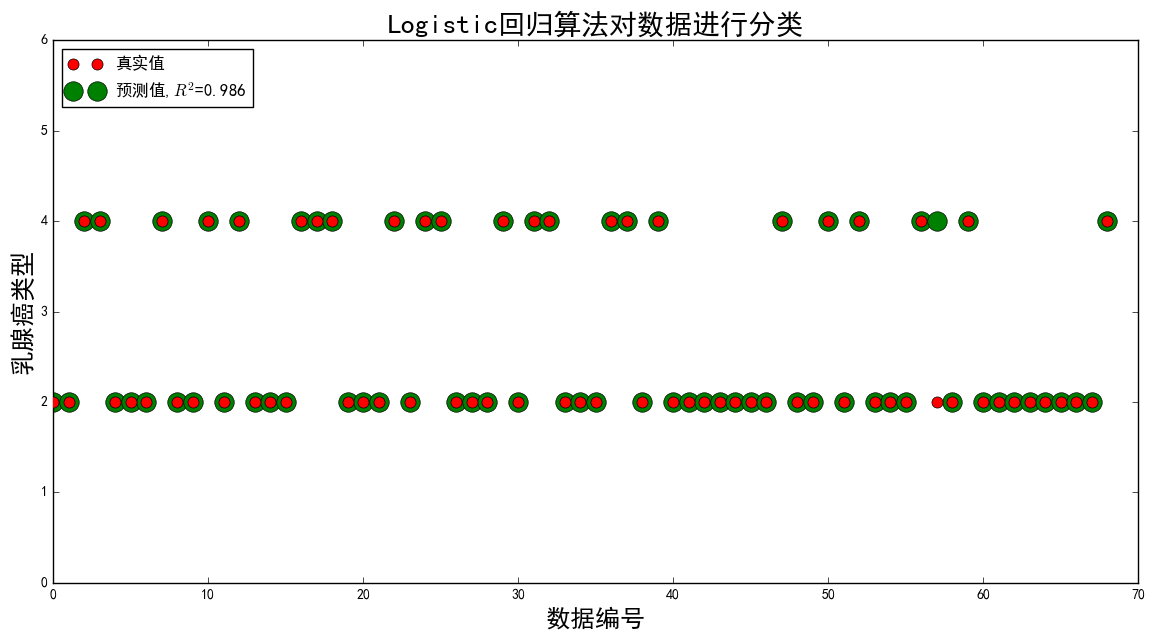

In [13]:

x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(0,6)
plt.plot(x_len, Y_test, 'ro',markersize = 8, zorder=3, label=u'真实值')
plt.plot(x_len, Y_predict, 'go', markersize = 14, zorder=2, label=u'预测值,$R^2$=%.3f' % lr.score(X_test, Y_test))
plt.legend(loc = 'upper left')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'乳腺癌类型', fontsize=18)
plt.title(u'Logistic回归算法对数据进行分类', fontsize=20)
plt.show()

In [17]:
print (Y_test.ravel())
print (Y_predict)

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4]
[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4]
